In [165]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, widgets
from NotebookUtils.ProgressBar import LogProgress as LP
plt.rcParams['font.family']='serif'
plt.rcParams['font.weight']='light'
plt.rcParams['font.size']=14
figsize = (12,6)
dataDir = '/Users/sdporzio/Data/'

# Understanding the type of data
1797 samples and 64 dimensions (!)

In [94]:
from sklearn import datasets
digits = datasets.load_digits()
np.shape(digits.data)

(1797, 64)

# Nearest Neighbour method vs Linear model

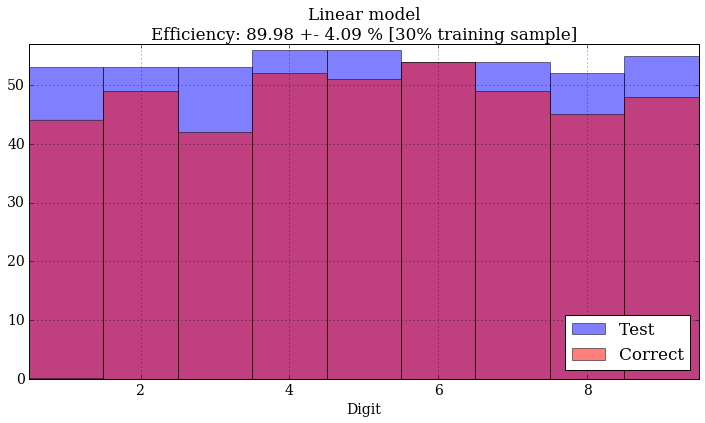

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def fitter(db=digits,model=0,percent=15):
    met = 0
    name = ''
    nTest = int(len(db.data)*(percent/100.))
    xTrain = db.data[:-nTest]
    yTrain = db.target[:-nTest]
    xTest = db.data[-nTest:]
    yTest = db.target[-nTest:]
    if model==0:
        name = 'Nearest Neighbour method'
        met = KNeighborsClassifier()
    elif model==1:
        name = 'Linear model'
        met = LogisticRegression(C=1e5) 
    met.fit(xTrain,yTrain)
    predicted = met.predict(xTest)
    correct = predicted[np.where(predicted==yTest)]
    efficiency = len(correct)/float(len(predicted))
    error = np.sqrt(len(correct))/float(len(predicted))

    plt.figure(figsize=figsize)
    bins = np.linspace(0.5,9.5,10)
    n1, bins1, hist1 = plt.hist(yTest,bins=bins,color='b',alpha=0.5,label='Test')
    n2, bins2, hist2 = plt.hist(correct,bins=bins,color='r',alpha=0.5,label='Correct')
    plt.title('%s\nEfficiency: %.2f +- %.2f %% [%i%% training sample]' %(name,efficiency*100.,error*100.,percent))
    plt.xlabel('Digit')
    plt.xlim(0.5,9.5)
    plt.ylim(0,max(np.concatenate((n1,n2)))+1)
    plt.grid()
    plt.legend(loc='lower right')
    
wPerc = (5,95,5)
wModel = {'Nearest Neighbour method':0, 'Linear model':1}

interact(fitter,db=fixed(digits),model=wModel,percent=wPerc)

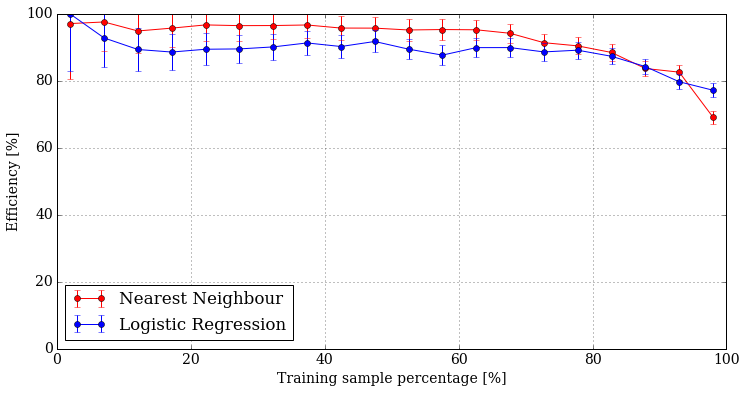

In [166]:
percRange = np.linspace(0.02,0.98,20)

efficiency = [[],[]]
error = [[],[]]
for perc in LP(percRange):
    nTest = int(len(digits.data)*(perc))
    xTrain = digits.data[:-nTest]
    yTrain = digits.target[:-nTest]
    xTest = digits.data[-nTest:]
    yTest = digits.target[-nTest:]

    knn = KNeighborsClassifier()
    knn.fit(xTrain,yTrain)
    knnPredicted = knn.predict(xTest)
    
    logistic = LogisticRegression(C=1e5)
    logistic.fit(xTrain,yTrain)
    logPredicted = logistic.predict(xTest)

    knnCorrect = knnPredicted[np.where(knnPredicted==yTest)]
    knnEff = len(knnCorrect)/float(len(knnPredicted))
    knnErr = np.sqrt(len(knnCorrect))/float(len(knnPredicted))
    
    logCorrect = logPredicted[np.where(logPredicted==yTest)]
    logEff = len(logCorrect)/float(len(logPredicted))
    logErr = np.sqrt(len(logCorrect))/float(len(logPredicted))
    
    efficiency[0].append(knnEff)
    error[0].append(knnErr)
    efficiency[1].append(logEff)
    error[1].append(logErr)
    
efficiency[0] = np.array(efficiency[0])*100.
error[0] = np.array(error[0])*100.
efficiency[1] = np.array(efficiency[1])*100.
error[1] = np.array(error[1])*100.
percRange = percRange*100.
    
plt.figure(figsize=figsize)
plt.errorbar(percRange,efficiency[0],yerr=error[0],color='r',marker='o',label='Nearest Neighbour')
plt.errorbar(percRange,efficiency[1],yerr=error[1],color='b',marker='o',label='Logistic Regression')
plt.ylabel('Efficiency [%]')
plt.xlabel('Training sample percentage [%]')
plt.ylim(0,100)
plt.grid()
plt.legend(loc='best')
plt.show()

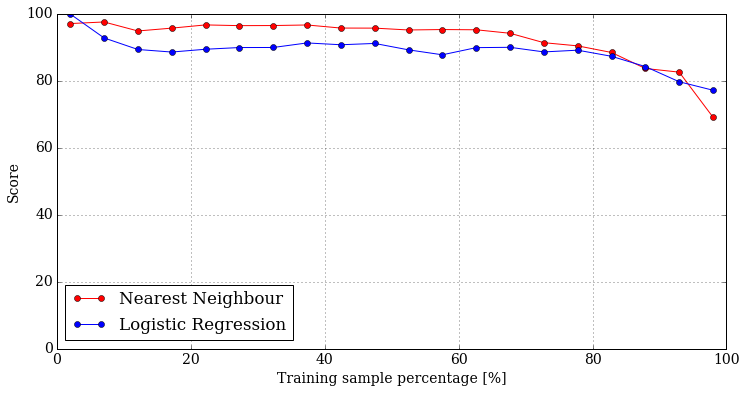

In [169]:
percRange = np.linspace(0.02,0.98,20)

efficiency = [[],[]]
error = [[],[]]
for perc in LP(percRange):
    nTest = int(len(digits.data)*(perc))
    xTrain = digits.data[:-nTest]
    yTrain = digits.target[:-nTest]
    xTest = digits.data[-nTest:]
    yTest = digits.target[-nTest:]

    knn = KNeighborsClassifier()
    knnFit = knn.fit(xTrain,yTrain)
    knnPredicted = knn.predict(xTest)
    
    logistic = LogisticRegression(C=1e5)
    logFit = logistic.fit(xTrain,yTrain)
    logPredicted = logistic.predict(xTest)

    knnCorrect = knnPredicted[np.where(knnPredicted==yTest)]
    knnEff = len(knnCorrect)/float(len(knnPredicted))
    knnErr = np.sqrt(len(knnCorrect))/float(len(knnPredicted))
    
    logCorrect = logPredicted[np.where(logPredicted==yTest)]
    logEff = len(logCorrect)/float(len(logPredicted))
    logErr = np.sqrt(len(logCorrect))/float(len(logPredicted))
    
    efficiency[0].append(knnFit.score(xTest,yTest))
    error[0].append(knnErr)
    efficiency[1].append(logFit.score(xTest,yTest))
    error[1].append(logErr)
    
efficiency[0] = np.array(efficiency[0])*100.
error[0] = np.array(error[0])*100.
efficiency[1] = np.array(efficiency[1])*100.
error[1] = np.array(error[1])*100.
percRange = percRange*100.
    
plt.figure(figsize=figsize)
plt.plot(percRange,efficiency[0],color='r',marker='o',label='Nearest Neighbour')
plt.plot(percRange,efficiency[1],color='b',marker='o',label='Logistic Regression')
plt.ylabel('Score')
plt.xlabel('Training sample percentage [%]')
plt.ylim(0,100)
plt.grid()
plt.legend(loc='best')
plt.show()